## Visualising CMIP data

As a first step towards making a visual comparison of the CSIRO-Mk3-6-0 and ACCESS1-3 historical precipitation climatology, we are going to create a quick plot of the ACCESS1-3 data. 

In [1]:
access_pr_file = '../data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

We are going to use the Met Office's [iris](http://scitools.org.uk/iris/) library, which has been specifically written with the analysis of CMIP data in mind.

In [13]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy

import warnings
warnings.filterwarnings('ignore')

Since CMIP data files can be very large, when you first "load" a data file in iris it simply loads the metadata (i.e. the netCDF file attributes). You can then view summary information about the contents of the file and select a particular subset of the data before actually loading it into memory. 

In [3]:
ds = xarray.open_dataset(access_pr_file)
precip = ds['pr']

In [4]:
print(type(precip))

<class 'xarray.core.dataarray.DataArray'>


In [5]:
precip

<xarray.DataArray 'pr' (time: 60, lat: 145, lon: 192)>
[1670400 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * time     (time) datetime64[ns] 2001-01-16T12:00:00 2001-02-15 ...
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    units:             kg m-2 s-1
    comment:           at surface; includes both liquid and solid phases from...
    cell_methods:      time: mean
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In this case the file isn't very large (five years worth of monthly data), so we can load it all into memory and convert the units from $kg \: m^{-2} \: s^{-1}$ to $mm \: day^{-1}$.

(You have to consider that:
- $1 \: kg$ of rain water spread over $1 \: m^2$ of surface is $1 \: mm$ in thickness;
- there are $60 \times 60 \times 24 = 86400$ seconds in one day.

Therefore, $1 kg \: m^{-2} \: s^{-1} = 86400 mm \: day^{-1}$)

In [6]:
print(type(precip.data))

<class 'numpy.ndarray'>


In [7]:
precip.data = precip.data * 86400
precip.attrs['units'] = 'mm/day'

In [8]:
precip

<xarray.DataArray 'pr' (time: 60, lat: 145, lon: 192)>
array([[[0.19356 , 0.19356 , ..., 0.193565, 0.193565],
        [0.144753, 0.145445, ..., 0.143843, 0.144203],
        ...,
        [0.234199, 0.224581, ..., 0.243426, 0.23944 ],
        [0.193997, 0.193997, ..., 0.193997, 0.193997]],

       [[0.407444, 0.407444, ..., 0.407334, 0.407334],
        [0.357676, 0.355279, ..., 0.362809, 0.360405],
        ...,
        [0.541897, 0.545767, ..., 0.537055, 0.53841 ],
        [0.548726, 0.548726, ..., 0.548726, 0.548726]],

       ...,

       [[0.22288 , 0.22288 , ..., 0.222746, 0.222746],
        [0.198965, 0.197357, ..., 0.202459, 0.201638],
        ...,
        [1.108785, 1.101874, ..., 1.127764, 1.119411],
        [0.899674, 0.899674, ..., 0.899674, 0.899674]],

       [[0.120204, 0.120204, ..., 0.120176, 0.120176],
        [0.077715, 0.077859, ..., 0.077662, 0.077223],
        ...,
        [0.641761, 0.651492, ..., 0.628137, 0.637484],
        [0.578696, 0.578696, ..., 0.578696, 0.578

To calculate the climatology, we can make use of the fact that Iris cubes have [built in functionality](http://scitools.org.uk/iris/docs/latest/userguide/cube_statistics.html#collapsing-entire-data-dimensions) for collapsing their dimensions.

In [9]:
clim = precip.mean('time')

In [10]:
print(clim)

<xarray.DataArray 'pr' (lat: 145, lon: 192)>
array([[0.219633, 0.219633, 0.219633, ..., 0.219595, 0.219595, 0.219595],
       [0.216989, 0.215353, 0.213664, ..., 0.222058, 0.220355, 0.218704],
       [0.207059, 0.204347, 0.201335, ..., 0.213612, 0.212137, 0.209712],
       ...,
       [0.767031, 0.769303, 0.772271, ..., 0.761992, 0.765431, 0.766643],
       [0.755878, 0.75512 , 0.753746, ..., 0.760066, 0.758275, 0.759378],
       [0.690219, 0.690219, 0.690219, ..., 0.690219, 0.690219, 0.690219]])
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...


The new climatology cube retains all relevant metadata (e.g. latitude and longitude details), which the `iris.plot` function uses to generate a plot in far fewer lines of code than would be required using `matplotlib.pyplot` (i.e. they've built `iris.plot` on top of `matplotlib.pyplot`, to make data visualisation much quicker and easier). 

(Use the built in `%matplotlib inline` magic command to make plots appear in the notebook rather than in a separate window.) 

In [11]:
%matplotlib inline

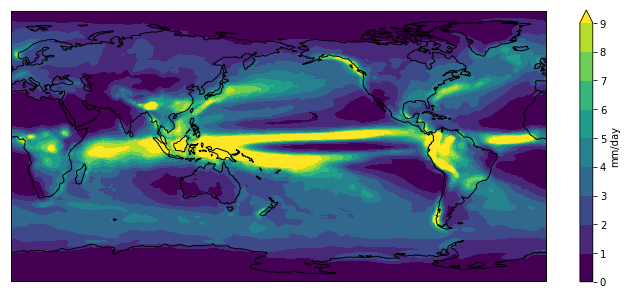

In [19]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(ax=ax, levels=numpy.arange(0, 10), extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': precip.units})
ax.coastlines()

plt.show()

The default colorbar used by matplotlib is `viridis`. It used to be `jet`, but that was changed a couple of years ago in response to the [#endtherainbow](https://www.climate-lab-book.ac.uk/2014/end-of-the-rainbow/) campaign.

Putting all the code together (and reversing viridis so that wet is purple and dry is yellow)...

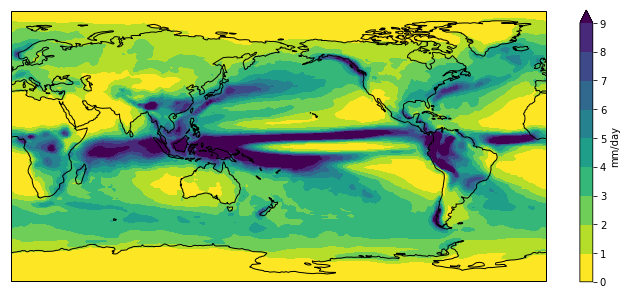

In [25]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy

access_pr_file = '../data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

ds = xarray.open_dataset(access_pr_file)
precip = ds['pr']

precip.data = precip.data * 86400
precip.attrs['units'] = 'mm/day'

clim = precip.mean('time')

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(ax=ax, levels=numpy.arange(0, 10), extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': precip.units},
                   cmap='viridis_r')
ax.coastlines()
plt.show()

**Challenge:** Copy and paste that slab of code into your own Jupyter notebook. Make the following additions/edits to the plot:

1. Once the cube is loaded, add a couple of lines of code to extract the data for the month of June. (Hint: Use the [iris.coord_categorisation](http://scitools.org.uk/iris/docs/latest/iris/iris/coord_categorisation.html) function to add a month coordinate to the cube, then use the [extract functionality](http://scitools.org.uk/iris/docs/latest/userguide/subsetting_a_cube.html#cube-extraction) with a month-based constraint.)

2. Add a title to the plot which gives the name of the model (taken from the cube attributes) followed by the words "precipitation climatology (Jun)"

3. The viridis color palette doesn't seem quite right for rainfall - change it to the [cmocean](http://matplotlib.org/cmocean/) palette used for ocean salinity data.